In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegression
from extrapolation import *
from experiments import RestartingExperiment

In [ ]:
device = "cuda"

X = []
with open("../sido0_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X = X[:11000]
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../sido0_train.targets") as f:
    y = [int(x) for x in f]
y = y[:11000]
y = torch.tensor(y, device=device)
X.shape, y.shape

In [ ]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
model = LogisticRegression(X_train, y_train, 1e-3, device="cuda")

In [5]:
model.fit(1e-8, max_iter=100500)

In [6]:
len(model.log)

100501

In [7]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.9777, device='cuda:0', dtype=torch.float64)

In [5]:
experiment = RestartingExperiment(model, 5, device="cuda", copy_model=False)

In [9]:
experiment.save("sidi0-restarts-1e-3.p")

In [6]:
n = 10000

In [11]:
experiment.run_method("RRE+QR", RRE, n, {"qr": True})

In [12]:
experiment.save("sidi0-restarts-1e-3.p")

In [13]:
experiment.run_method("RNA", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [14]:
experiment.save("sidi0-restarts-1e-3.p")

In [15]:
experiment.run_method("RNA+norm", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [16]:
experiment.save("sidi0-restarts-1e-3.p")

In [8]:
experiment.run_method("RNA+ls", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [9]:
experiment.save("sidi0-restarts-1e-3.p")

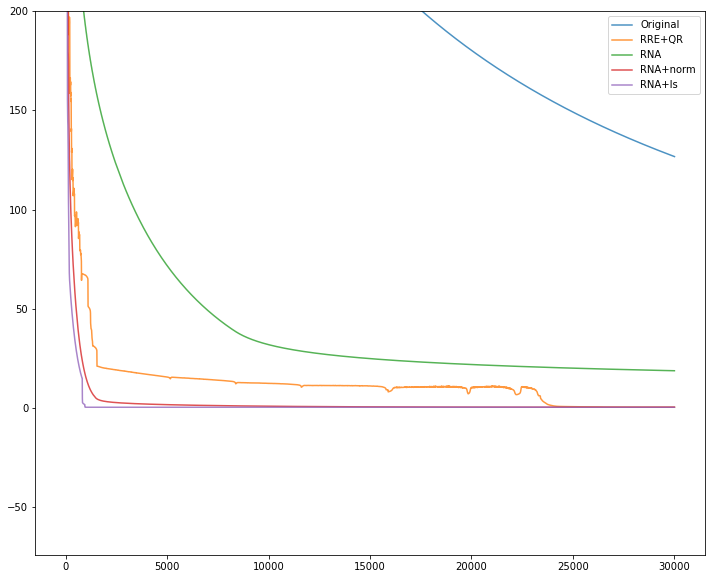

In [11]:
experiment.plot_values(n=30000, figsize=(12, 10), ylim=(None, 200))

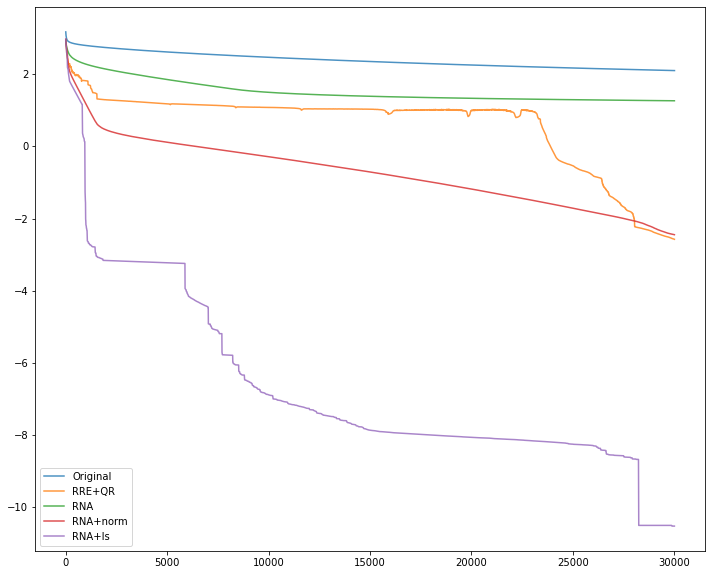

In [12]:
experiment.plot_log_diff(n=30000, figsize=(12, 10), vs_original=False)

In [6]:
experiment.load("sidi0-restarts-1e-3.p")

In [8]:
model.theta = experiment.best_x
preds = model.predict(X_test.cpu())
torch.mean((preds == y_test.cpu()).double())

tensor(0.9750, dtype=torch.float64)